In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

import os

In [3]:
train = pd.read_csv('train.csv')
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test = pd.read_csv('test.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

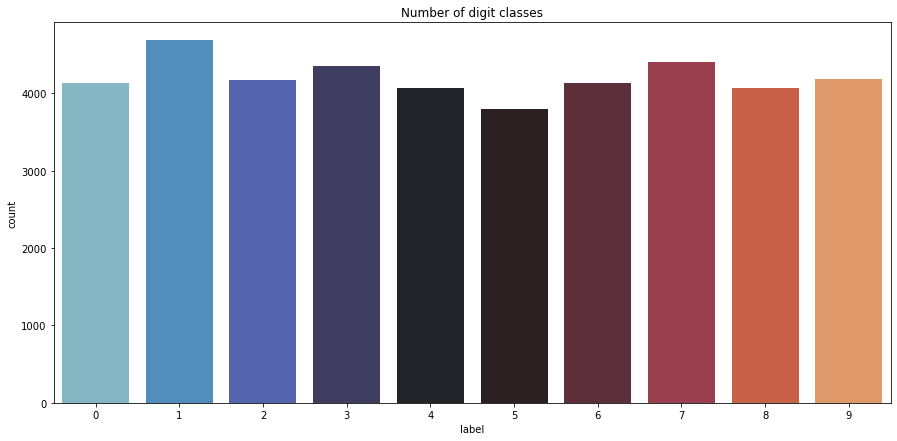

In [5]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)

plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

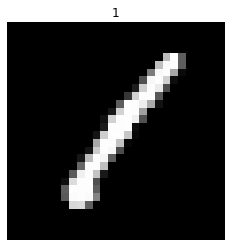

In [6]:
img = train.drop(labels = ["label"],axis = 1).iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

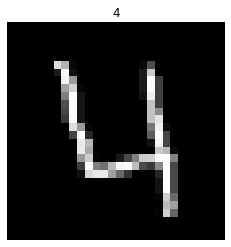

In [7]:
img = train.drop(labels = ["label"],axis = 1).iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

In [8]:
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)
x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [9]:
from keras.utils.np_utils import to_categorical 
Y_train = to_categorical(Y_train, num_classes = 10)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1
, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


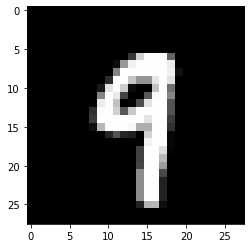

In [11]:
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [12]:
import tensorflow as tf
import itertools
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D


from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [13]:
optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [14]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [15]:
epochs = 10 
batch_size = 250

In [16]:
datagen = ImageDataGenerator(
  featurewise_center=False,
  samplewise_center=False,
  featurewise_std_normalization=False, 
  samplewise_std_normalization=False,
  zca_whitening=False, 
  rotation_range=0.5,
  zoom_range = 0.5, 
  width_shift_range=0.5, 
  height_shift_range=0.5, 
  horizontal_flip=False, 
  vertical_flip=False 
)
datagen.fit(X_train)

In [17]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
151/151 [==============================] - 22s 142ms/step - loss: 2.1891 - accuracy: 0.1827 - val_loss: 1.7593 - val_accuracy: 0.3621
Epoch 2/10
151/151 [==============================] - 20s 135ms/step - loss: 1.8941 - accuracy: 0.3244 - val_loss: 1.1912 - val_accuracy: 0.6300
Epoch 3/10
151/151 [==============================] - 20s 136ms/step - loss: 1.6869 - accuracy: 0.4133 - val_loss: 0.7555 - val_accuracy: 0.8174
Epoch 4/10
151/151 [==============================] - 21s 139ms/step - loss: 1.5705 - accuracy: 0.4592 - val_loss: 0.5911 - val_accuracy: 0.8633
Epoch 5/10
151/151 [==============================] - 21s 138ms/step - loss: 1.4998 - accuracy: 0.4850 - val_loss: 0.4810 - val_accuracy: 0.8860
Epoch 6/10
151/151 [==============================] - 21s 136ms/step - loss: 1.4504 - accuracy: 0.5031 - val_loss: 0.4222 - val_accuracy: 0.8931
Epoch 7/10
151/151 [==============================] - 

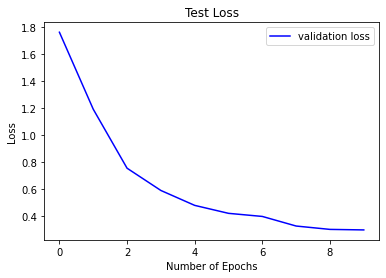

In [18]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

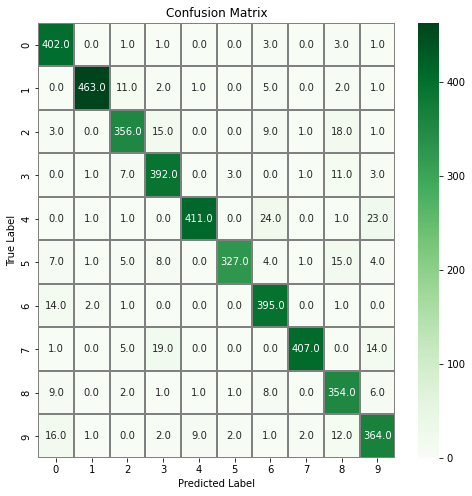

In [19]:

import seaborn as sns

Y_pred = model.predict(X_val)

Y_pred_classes = np.argmax(Y_pred,axis = 1)

Y_true = np.argmax(Y_val,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Experiment with mode convolutional layers

In [20]:

model1 = Sequential()

model1.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
activation ='relu', input_shape = (28,28,1)))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

# Second conv layer
model1.add(Conv2D(filters = 16, kernel_size = (4,3),padding = 'Same',
activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(256, activation = "relu"))
model1.add(Dropout(0.5))
model1.add(Dense(10, activation = "softmax"))

For this example we will use:
- Optimizer Nadam (Nesterov adaptive moment)
- Different parameters in image generator:
  - horizontal_flip=True (Flip images horizontally)
  - vertical_flip=True (randomly flip images) 
  - rotation_range=0.6 (randomly rotate images in the range 5 degrees)
  - featurewise_center=True

In [21]:
optimizer = tf.keras.optimizers.Nadam(lr=0.0001, beta_1=0.9, beta_2=0.999)
model1.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

In [22]:
datagen = ImageDataGenerator(
  featurewise_center=False,
  samplewise_center=False, 
  featurewise_std_normalization=False, 
  samplewise_std_normalization=False, 
  zca_whitening=False, 
  rotation_range=0.6, 
  zoom_range = 0.5,
  width_shift_range=0.5, 
  height_shift_range=0.5,
  horizontal_flip=True, 
  vertical_flip=True 
) 
datagen.fit(X_train)

In [23]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 21s 141ms/step - loss: 1.8967 - accuracy: 0.3453 - val_loss: 0.6713 - val_accuracy: 0.8931
Epoch 2/10
151/151 [==============================] - 20s 136ms/step - loss: 1.7776 - accuracy: 0.3725 - val_loss: 0.7000 - val_accuracy: 0.8681
Epoch 3/10
151/151 [==============================] - 20s 134ms/step - loss: 1.7426 - accuracy: 0.3872 - val_loss: 0.7071 - val_accuracy: 0.8300
Epoch 4/10
151/151 [==============================] - 21s 139ms/step - loss: 1.7090 - accuracy: 0.3981 - val_loss: 0.6891 - val_accuracy: 0.8505
Epoch 5/10
151/151 [==============================] - 21s 140ms/step - loss: 1.6916 - accuracy: 0.4024 - val_loss: 0.6749 - val_accuracy: 0.8536
Epoch 6/10
151/151 [==============================] - 21s 136ms/step - loss: 1.6683 - accuracy: 0.4063 - val_loss: 0.6619 - val_accuracy: 0.8657
Epoch 7/10
151/151 [==============================] - 21s 136ms/step - loss: 1.6514 - accuracy: 0.4166 - val_loss: 0.6790 - val_ac

- Rectangular conv matrix
- rotation_range=0.6
- horizontal_flip=*True*
- vertical_flip=True 

In [24]:
history = model1.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 24s 159ms/step - loss: 2.3096 - accuracy: 0.1004 - val_loss: 2.2977 - val_accuracy: 0.1288
Epoch 2/10
151/151 [==============================] - 22s 147ms/step - loss: 2.3001 - accuracy: 0.1119 - val_loss: 2.2941 - val_accuracy: 0.1086
Epoch 3/10
151/151 [==============================] - 22s 147ms/step - loss: 2.2959 - accuracy: 0.1198 - val_loss: 2.2879 - val_accuracy: 0.1183
Epoch 4/10
151/151 [==============================] - 22s 148ms/step - loss: 2.2898 - accuracy: 0.1314 - val_loss: 2.2735 - val_accuracy: 0.1855
Epoch 5/10
151/151 [==============================] - 22s 146ms/step - loss: 2.2788 - accuracy: 0.1528 - val_loss: 2.2426 - val_accuracy: 0.1950
Epoch 6/10
151/151 [==============================] - 22s 148ms/step - loss: 2.2557 - accuracy: 0.1670 - val_loss: 2.1773 - val_accuracy: 0.2019
Epoch 7/10
151/151 [==============================] - 23s 153ms/step - loss: 2.2228 - accuracy: 0.1759 - val_loss: 2.1105 - val_ac

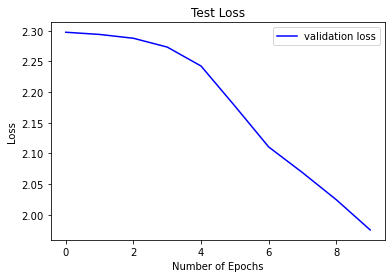

In [25]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

- Rectangular conv matrix
- vertical_flip=True
- rotation_range=0.6

In [26]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 21s 140ms/step - loss: 1.6016 - accuracy: 0.4346 - val_loss: 0.6746 - val_accuracy: 0.8102
Epoch 2/10
151/151 [==============================] - 22s 146ms/step - loss: 1.5972 - accuracy: 0.4363 - val_loss: 0.6862 - val_accuracy: 0.8083
Epoch 3/10
151/151 [==============================] - 21s 137ms/step - loss: 1.5787 - accuracy: 0.4418 - val_loss: 0.6817 - val_accuracy: 0.8048
Epoch 4/10
151/151 [==============================] - 21s 140ms/step - loss: 1.5735 - accuracy: 0.4444 - val_loss: 0.6549 - val_accuracy: 0.8155
Epoch 5/10
151/151 [==============================] - 21s 136ms/step - loss: 1.5647 - accuracy: 0.4452 - val_loss: 0.6631 - val_accuracy: 0.7819
Epoch 6/10
151/151 [==============================] - 21s 141ms/step - loss: 1.5615 - accuracy: 0.4472 - val_loss: 0.6597 - val_accuracy: 0.8243
Epoch 7/10
151/151 [==============================] - 21s 139ms/step - loss: 1.5613 - accuracy: 0.4459 - val_loss: 0.6560 - val_ac

- Rectangular conv matrix
- featurewise_center=True

In [27]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 21s 138ms/step - loss: 1.5363 - accuracy: 0.4570 - val_loss: 0.6806 - val_accuracy: 0.8002
Epoch 2/10
151/151 [==============================] - 20s 135ms/step - loss: 1.5321 - accuracy: 0.4611 - val_loss: 0.6692 - val_accuracy: 0.8090
Epoch 3/10
151/151 [==============================] - 21s 137ms/step - loss: 1.5157 - accuracy: 0.4667 - val_loss: 0.6550 - val_accuracy: 0.8202
Epoch 4/10
151/151 [==============================] - 21s 137ms/step - loss: 1.5117 - accuracy: 0.4655 - val_loss: 0.6216 - val_accuracy: 0.8188
Epoch 5/10
151/151 [==============================] - 21s 136ms/step - loss: 1.5148 - accuracy: 0.4691 - val_loss: 0.6391 - val_accuracy: 0.8171
Epoch 6/10
151/151 [==============================] - 21s 137ms/step - loss: 1.5089 - accuracy: 0.4672 - val_loss: 0.6302 - val_accuracy: 0.8262
Epoch 7/10
151/151 [==============================] - 21s 139ms/step - loss: 1.4966 - accuracy: 0.4705 - val_loss: 0.6317 - val_ac

# Conclusion:
All tests were run on numbers dataset for 10 epochs.
- Rectangular conv matrix performs worse, than square. Accuracy: 80%
- Rotation also makes the accuracy worse, but is better because it is more universal. Accuracy: 52%
- Featurewise_center performs the worse. Accuracy: 37%

# Lenet-5

In [28]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu',
input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu')
)
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [29]:
model.build()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               307456    
_________________________________________________________________
dense_5 (Dense)              (None, 84)               

In [30]:
adam = tf.keras.optimizers.Adam(lr=5e-4)
model.compile(
  loss='categorical_crossentropy', 
  metrics=['accuracy'], 
  optimizer=adam
)

In [31]:
reduce_lr = ReduceLROnPlateau(
  monitor='val_acc',
  patience=3,
  verbose=1,
  factor=0.2,
  min_lr=1e-6
)

In [32]:
datagen = ImageDataGenerator(
  rotation_range=10,
  width_shift_range=0.1,
  height_shift_range=0.1,
  zoom_range=0.1
)

datagen.fit(X_train)

In [33]:
model.fit_generator(
  datagen.flow(X_train, Y_train, batch_size=100), 
  steps_per_epoch=len(X_train)/100,
  epochs=30, 
  validation_data=(X_val, Y_val), 
  callbacks=[reduce_lr]
)

Epoch 1/30
378/378 [==============================] - 41s 107ms/step - loss: 0.4804 - accuracy: 0.8507 - val_loss: 0.1287 - val_accuracy: 0.9629
Epoch 2/30
378/378 [==============================] - 41s 108ms/step - loss: 0.1455 - accuracy: 0.9554 - val_loss: 0.0879 - val_accuracy: 0.9750
Epoch 3/30
378/378 [==============================] - 40s 107ms/step - loss: 0.1000 - accuracy: 0.9691 - val_loss: 0.0595 - val_accuracy: 0.9814
Epoch 4/30
378/378 [==============================] - 41s 109ms/step - loss: 0.0785 - accuracy: 0.9761 - val_loss: 0.0627 - val_accuracy: 0.9836
Epoch 5/30
378/378 [==============================] - 40s 106ms/step - loss: 0.0669 - accuracy: 0.9799 - val_loss: 0.0355 - val_accuracy: 0.9907
Epoch 6/30
378/378 [==============================] - 40s 107ms/step - loss: 0.0598 - accuracy: 0.9820 - val_loss: 0.0379 - val_accuracy: 0.9886
Epoch 7/30
378/378 [==============================] - 41s 109ms/step - loss: 0.0539 - accuracy: 0.9832 - val_loss: 0.0391 - val_ac

In [34]:
score = model.evaluate(X_val, Y_val, batch_size=32)

132/132 [==============================] - 1s 9ms/step - loss: 0.0204 - accuracy: 0.9950


In [35]:
X_test = np.array(test)
X_test = X_test/255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
Y_test = model.predict(X_test)
Y_test = np.argmax(Y_test, axis=1)
Y_test[:5]

array([8, 8, 8, 8, 8], dtype=int64)

# General conclusion:
Dirung this lab I tested different approaches to train the model to predict hand written digits.
<br><br>
The best result was performed by model LeNet-5.
After 30 epochs it reached 99.38% validation accuracy.
<br><br>
When I tried to augment data by torating it horisontally/vertically or tried to use Featurewise_center, I got bad results (<50% accuracy on 10 classes)
<br><br>
I tried to use rectangular cernel in convolutional layer for this exact dataset, but it also performed worse, than square.